In [9]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json

# Load Data Pada CSV dan Proses menjadi Data Time Series

In [54]:
#Load data csv dan format data tahun bulan menjadi data frame
df = pd.read_csv('DATASET_PAJAK_HIBURAn.csv')
df['tahun'] = pd.to_datetime(df['tahun_bulan'])
df.head()

,tahun_bulan,jml_setor,tahun
0,2012-1,32111233,2012-01-01
1,2012-2,33255920,2012-02-01
2,2012-3,33063951,2012-03-01
3,2012-4,31610026,2012-04-01
4,2012-5,36305599,2012-05-01


In [55]:
#Buat data tiemseries berdasar key value dari data frame
dts = pd.Series(data=df['jml_setor'].values, index=df['tahun'])
dts.head()
json_data = dts.to_json(date_format='iso')
print(json_data)
with open('./datasets/hiburan.json', 'w') as f:
    json.dump(json_data, f) 

{"2012-01-01T00:00:00.000":32111233,"2012-02-01T00:00:00.000":33255920,"2012-03-01T00:00:00.000":33063951,"2012-04-01T00:00:00.000":31610026,"2012-05-01T00:00:00.000":36305599,"2012-06-01T00:00:00.000":72292106,"2012-07-01T00:00:00.000":50333232,"2012-08-01T00:00:00.000":36829306,"2012-09-01T00:00:00.000":129530092,"2012-10-01T00:00:00.000":58116148,"2012-11-01T00:00:00.000":47112990,"2012-12-01T00:00:00.000":36767277,"2013-01-01T00:00:00.000":68956599,"2013-02-01T00:00:00.000":64149353,"2013-03-01T00:00:00.000":66548368,"2013-04-01T00:00:00.000":65054322,"2013-05-01T00:00:00.000":53274461,"2013-06-01T00:00:00.000":42037896,"2013-07-01T00:00:00.000":80306162,"2013-08-01T00:00:00.000":129530092,"2013-09-01T00:00:00.000":106202044,"2013-10-01T00:00:00.000":52551748,"2013-11-01T00:00:00.000":59015605,"2013-12-01T00:00:00.000":68363081,"2014-01-01T00:00:00.000":73923593,"2014-02-01T00:00:00.000":94146781,"2014-03-01T00:00:00.000":68205329,"2014-04-01T00:00:00.000":100826213,"2014-05-01T00:

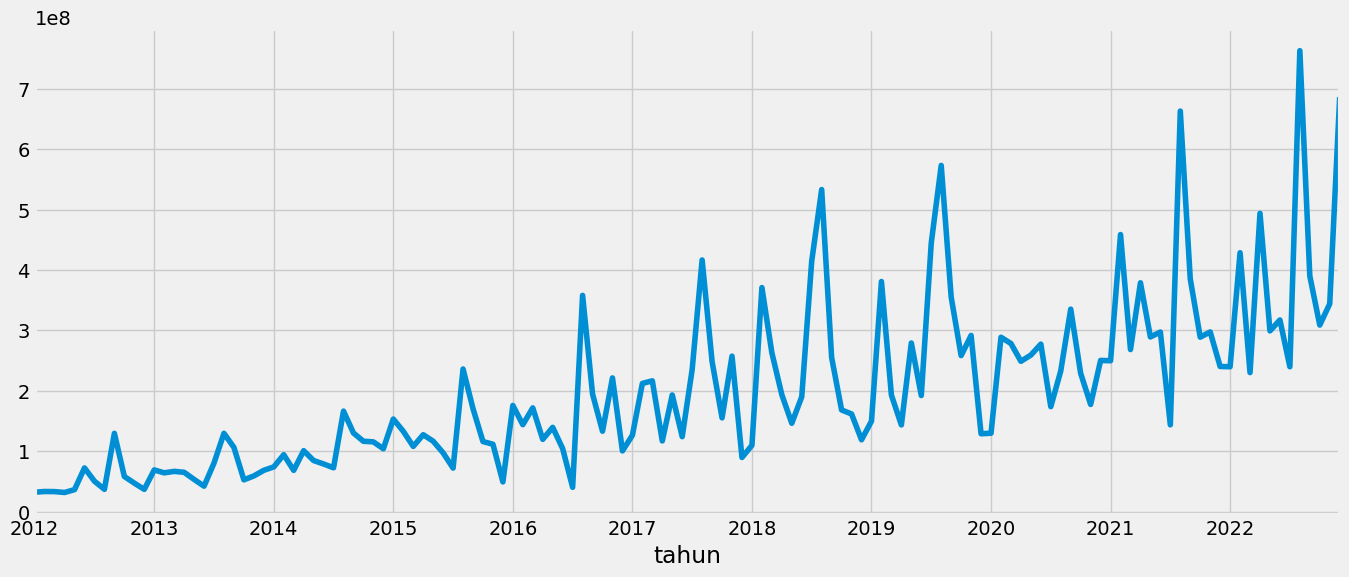

In [56]:
dts.plot(figsize=(15, 6))
plt.show()

# Mencari parameter terbaik ARIMA p, d, q

In [52]:
# Tentukan parameter p, d, dan q untuk mengambil nilai antara 0 sampai 3
p = d = q = range(0, 6)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Hasilkan semua kombinasi berbeda dari triplet p, q, dan q musiman
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [100]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages
best_result = [0, 0, 10000000]
p_params = [0, 1, 2, 3]
d_params = [0, 1, 2]
q_params = [0, 1, 2, 3]
P_params = [0, 1, 2, 3]
D_params = [0, 1, 2]
Q_params = [0, 1, 2, 3]
for p in p_params:
    for d in d_params:
        for q in q_params:
            for P in P_params:
                for D in D_params:
                    for Q in Q_params:
                        param = [p, d, q]
                        param_seasonal = [P, D, Q, 12]
                        try:
                            mod = sm.tsa.statespace.SARIMAX(dts, order=param, seasonal_order=param_seasonal)
                            results = mod.fit()
                            if results.aic < best_result[2]:
                                if results.aic > 300:
                                    best_result = [param, param_seasonal, results.aic]
                                    print('Best Result:', best_result)
                        except:
                            continue
print('\nBest Result:', best_result)

Best Result: [[0, 0, 0], [0, 0, 0, 12], 5447.660572581926]
Best Result: [[0, 0, 0], [0, 0, 1, 12], 5423.968763123999]
Best Result: [[0, 0, 0], [0, 0, 3, 12], 5371.565293730853]
Best Result: [[0, 0, 0], [0, 1, 0, 12], 4845.8776521454565]
Best Result: [[0, 0, 0], [0, 1, 1, 12], 4831.648163356782]
Best Result: [[0, 0, 0], [0, 2, 0, 12], 4479.451656994518]
Best Result: [[0, 0, 0], [0, 2, 1, 12], 4439.751187765608]
Best Result: [[0, 0, 0], [0, 2, 3, 12], 4401.677511045242]


# Plot model diagnostics

In [57]:

warnings.filterwarnings("ignore") # specify to ignore warning messages
mod = sm.tsa.statespace.SARIMAX(dts,
                                order=(3, 2, 1),
                                seasonal_order=(3, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True,)

results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 2, 1)x(3, 2, 1, 12)   Log Likelihood               -2132.817
Date:                            Sat, 01 Apr 2023   AIC                           4283.635
Time:                                    04:25:18   BIC                           4307.606
Sample:                                01-01-2012   HQIC                          4293.350
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6129      0.299     -2.052      0.040      -1.198      -0.028
ar.L2         -0.4685      0.367   

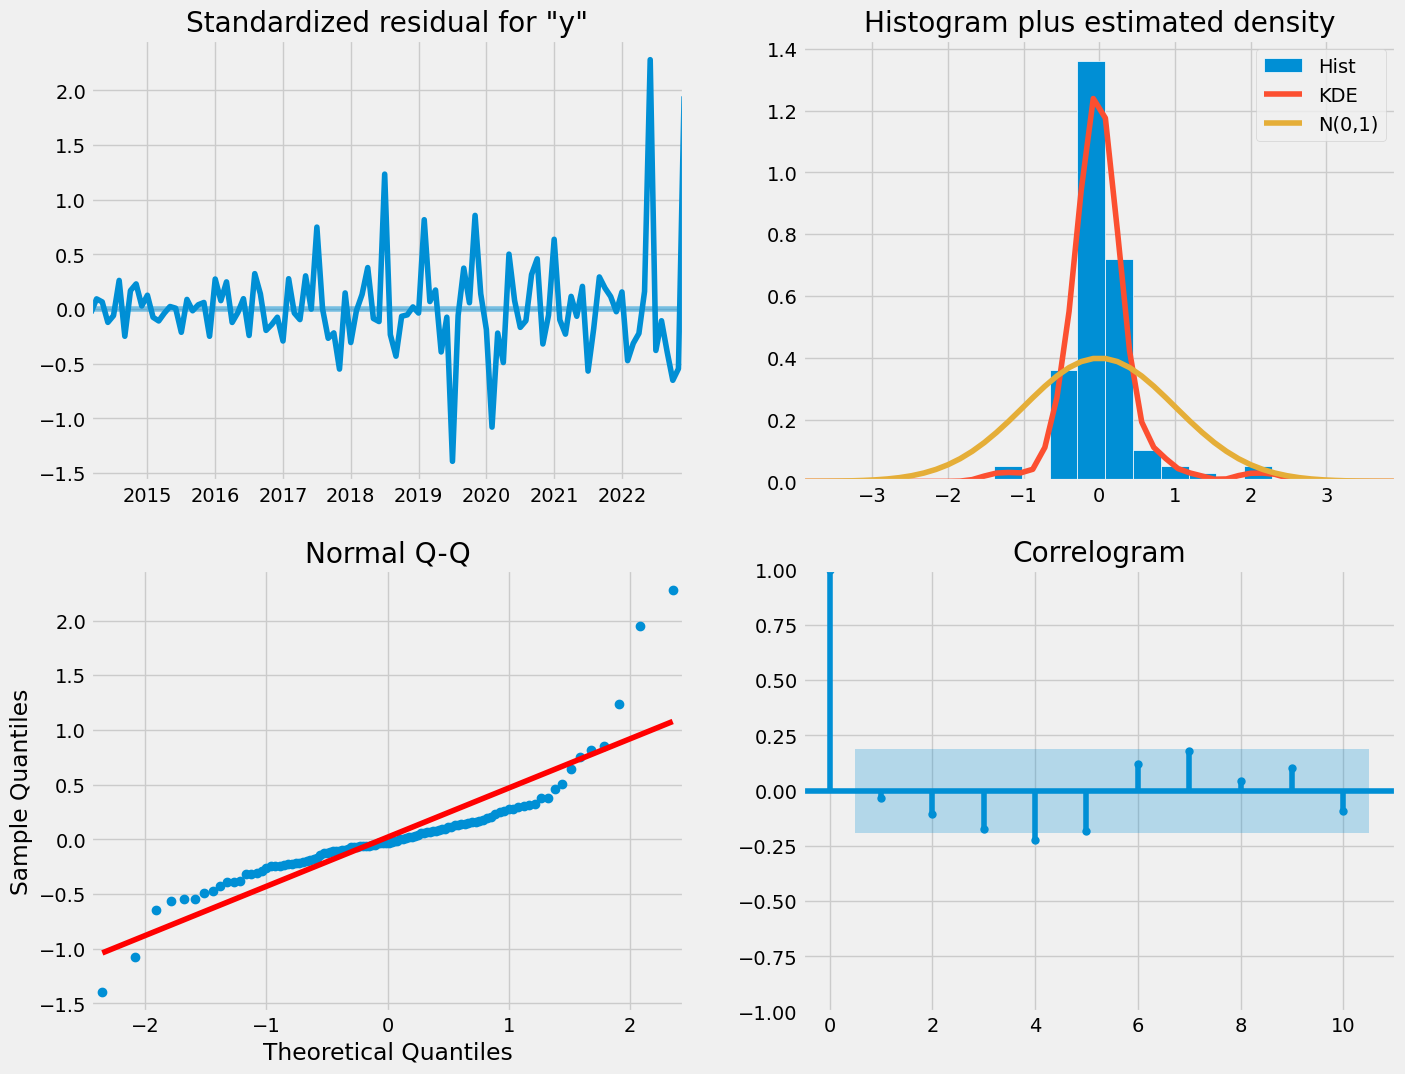

In [34]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [58]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

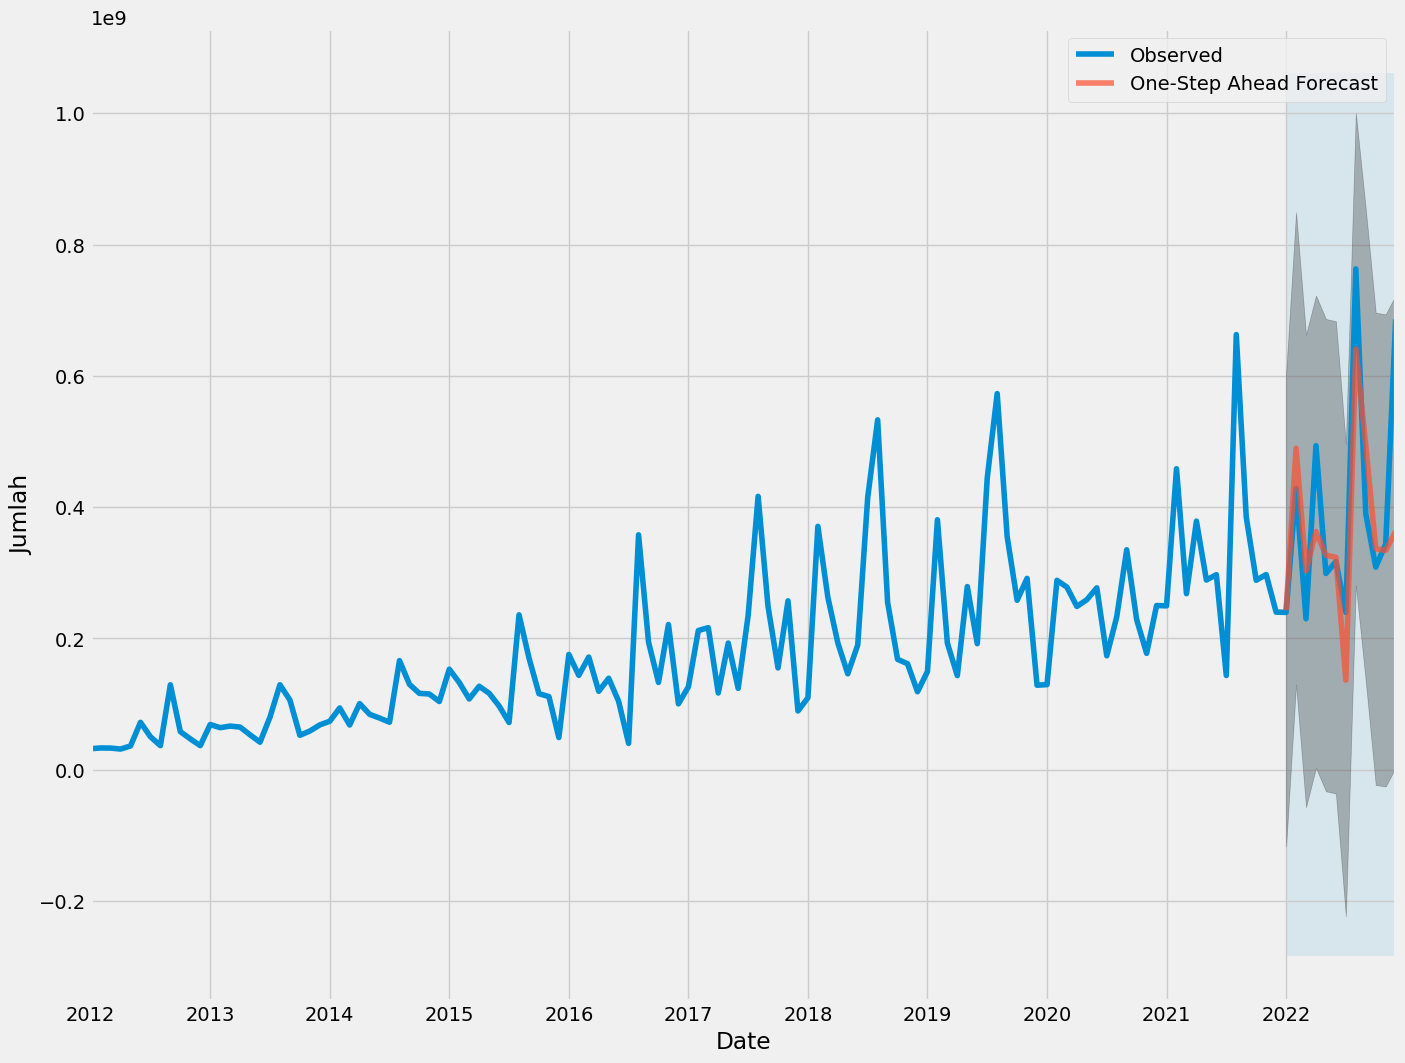

{"2022-01-01T00:00:00.000":242903186.7670901418,"2022-02-01T00:00:00.000":489568468.0844106674,"2022-03-01T00:00:00.000":302966290.7308632135,"2022-04-01T00:00:00.000":362705064.7049972415,"2022-05-01T00:00:00.000":326966374.530762434,"2022-06-01T00:00:00.000":323525765.1838179827,"2022-07-01T00:00:00.000":136601063.5502130389,"2022-08-01T00:00:00.000":640841669.4855377674,"2022-09-01T00:00:00.000":494366237.7657314539,"2022-10-01T00:00:00.000":336541982.0273708701,"2022-11-01T00:00:00.000":334212018.2104269266,"2022-12-01T00:00:00.000":363136986.5411580801}


In [59]:
ax = dts['2010':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2022-01-01'), dts.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Jumlah')
plt.legend()

plt.show()


json_data = pred.predicted_mean.to_json(date_format='iso')
print(json_data)
with open('./datasets/hiburan_predicted_ahead.json', 'w') as f:
    json.dump(json_data, f)

In [60]:
df_test = df[df.tahun.between('2022-01', '2022-12')]
dts_test = pd.Series(data=df_test['jml_setor'].values, index=df_test['tahun'])
y_test, pred_ahead = np.array(dts_test), np.array(pred.predicted_mean)
list_ape = []
for index, elem in np.ndenumerate(pred_ahead):
    ape = np.abs(elem-y_test[index]) / y_test[index]
    list_ape.append(ape*100)
mape = np.mean(list_ape)
print(list_ape)
print(mape)

[1.3363133886004943, 14.265711316504145, 31.69324575418647, 26.52780709866641, 9.332094286313168, 1.9927079236562568, 43.011664979045065, 15.998816419860928, 26.742849286084823, 9.016634552300683, 2.8137557539553653, 47.065259193615425]
19.149738329399103


In [18]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

# Prediksi data selama 2 tahun

In [19]:
# prediksi 24 langkah ke depan di masa mendatang
pred_uc = results.get_forecast(steps=24, dynamic=False)
# Dapatkan interval
pred_ci = pred_uc.conf_int()
json_data = pred_uc.predicted_mean.to_json(date_format='iso')
print(json_data)
with open('./datasets/hiburan_predicted.json', 'w') as f:
    json.dump(json_data, f) 

{"2023-01-01T00:00:00.000":384464107.9574211836,"2023-02-01T00:00:00.000":488990518.7638800144,"2023-03-01T00:00:00.000":290456617.5225633383,"2023-04-01T00:00:00.000":496288699.0651579499,"2023-05-01T00:00:00.000":472566598.9242168069,"2023-06-01T00:00:00.000":696569815.1564712524,"2023-07-01T00:00:00.000":370830329.4791479111,"2023-08-01T00:00:00.000":960377822.7777446508,"2023-09-01T00:00:00.000":632959081.1315392256,"2023-10-01T00:00:00.000":454498139.558966279,"2023-11-01T00:00:00.000":408112491.4488223195,"2023-12-01T00:00:00.000":690942627.6512868404,"2024-01-01T00:00:00.000":622514093.798977375,"2024-02-01T00:00:00.000":661415909.536200285,"2024-03-01T00:00:00.000":435829259.1132891774,"2024-04-01T00:00:00.000":545988898.9917371273,"2024-05-01T00:00:00.000":680669499.1617431641,"2024-06-01T00:00:00.000":1378344581.0674114227,"2024-07-01T00:00:00.000":452209550.1636103392,"2024-08-01T00:00:00.000":1298656134.0627663136,"2024-09-01T00:00:00.000":850126797.5786774158,"2024-10-01T0

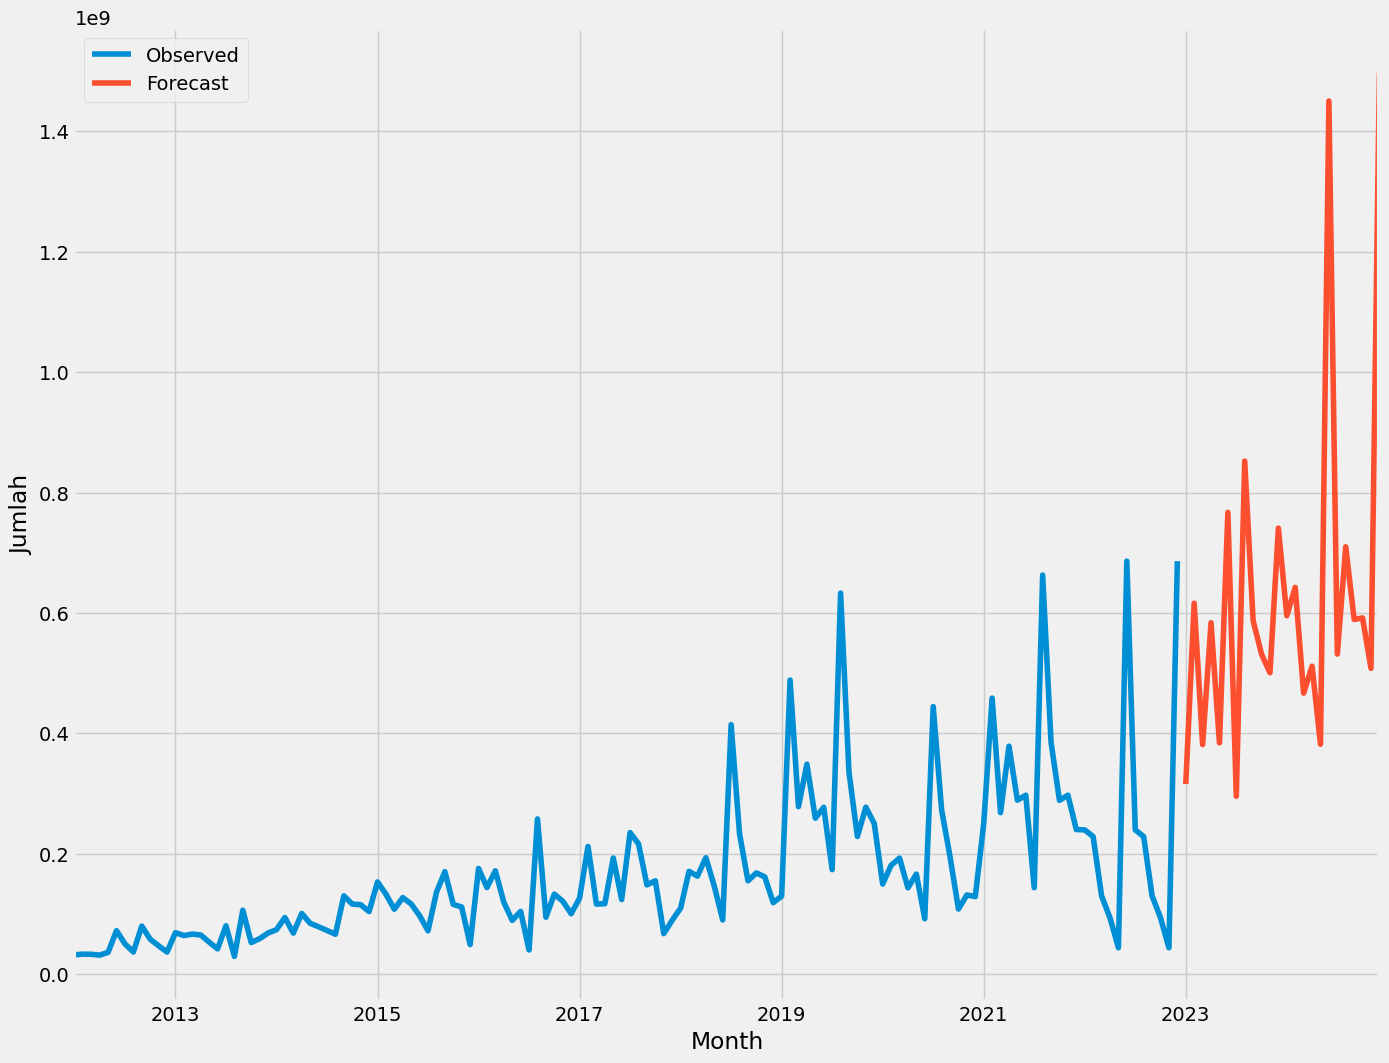

In [87]:
ax = dts.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('Jumlah')

plt.legend()
plt.show()
